# **Task # 1**

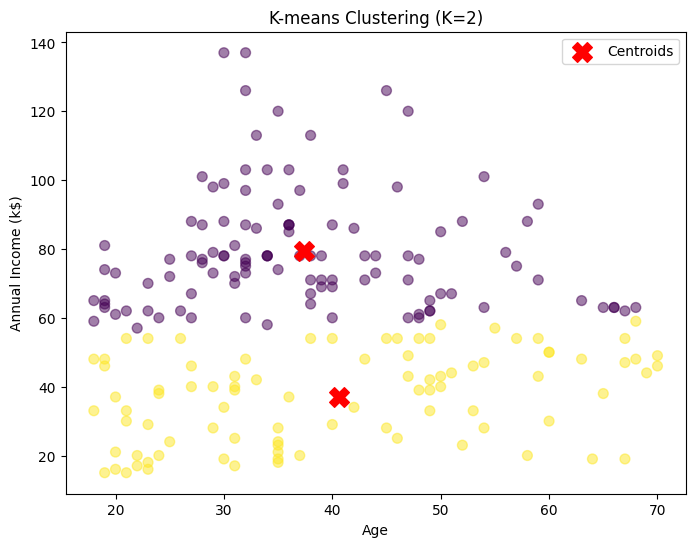

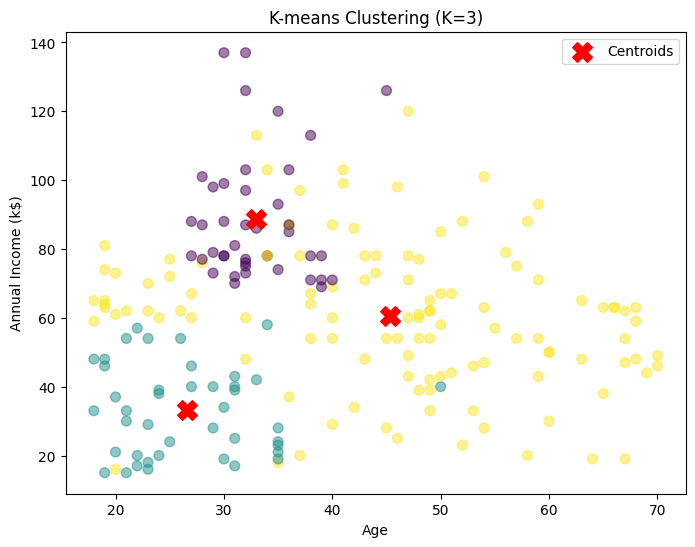

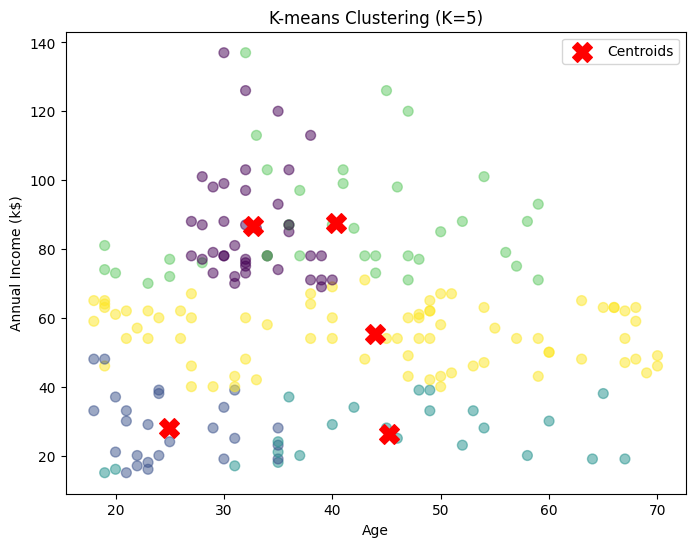

For K = 2
     CustomerID    Gender        Age  Annual Income (k$)  \
0.0  162.000000  0.538462  32.692308           86.538462   
1.0   27.480000  0.560000  24.960000           28.040000   
2.0   23.000000  0.608696  45.217391           26.304348   
3.0  162.945946  0.486486  40.324324           87.432432   
4.0   86.013158  0.592105  43.934211           55.210526   

     Spending Score (1-100)  
0.0               82.128205  
1.0               77.000000  
2.0               20.913043  
3.0               18.189189  
4.0               49.447368  
For K = 3
     CustomerID    Gender        Age  Annual Income (k$)  \
0.0  162.000000  0.538462  32.692308           86.538462   
1.0   27.480000  0.560000  24.960000           28.040000   
2.0   23.000000  0.608696  45.217391           26.304348   
3.0  162.945946  0.486486  40.324324           87.432432   
4.0   86.013158  0.592105  43.934211           55.210526   

     Spending Score (1-100)  
0.0               82.128205  
1.0               

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset into your preferred programming environment.
data = pd.read_csv("Mall_Customers.csv")

# Step 2: Preprocess the data as necessary. You may need to encode categorical variables like Gender.
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Step 3: Choose appropriate features for clustering. Consider using Age, Annual Income, and Spending Score for segmentation.
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Step 4: Try different number of K values i.e., K=2, 3, 5.
k_values = [2, 3, 5]

# Steps 5 & 6: Perform K-means clustering on the selected features and visualize the clusters.
for K in k_values:
    centroids = X.sample(K, random_state=42).values

    clusters = np.zeros(len(X))

    max_iter = 300
    epsilon = 0.0001

    # K-means algorithm
    for _ in range(max_iter):

        for i in range(len(X)):
            distances = np.linalg.norm(X.iloc[i].values - centroids, axis=1)
            clusters[i] = np.argmin(distances)

        new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(K)])

        if np.all(np.abs(new_centroids - centroids) < epsilon):
            break

        centroids = new_centroids

    # Plot clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-means Clustering (K={K})')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()
    plt.show()

# Step 7: Interpret the results and provide recommendations for marketing strategies
for K in k_values:
    print("For K =", K)
    print(data.groupby(clusters).mean())


# **Task # 3**

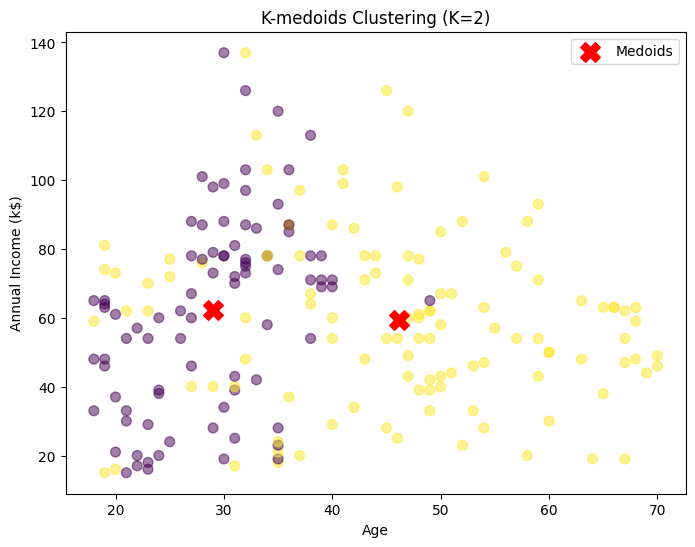

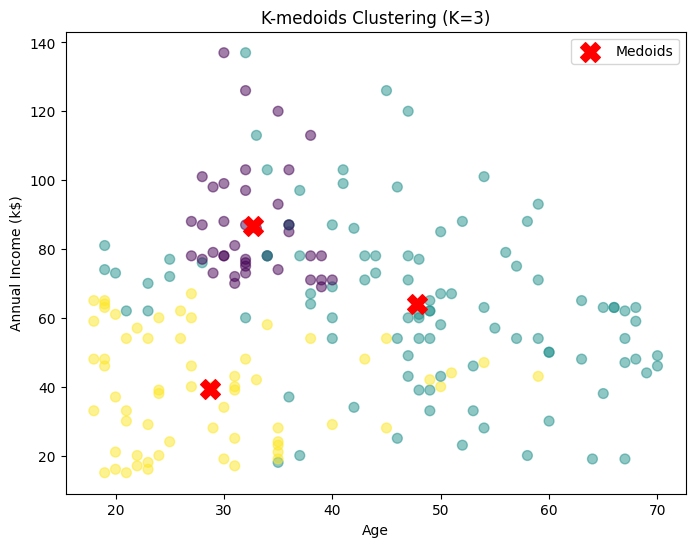

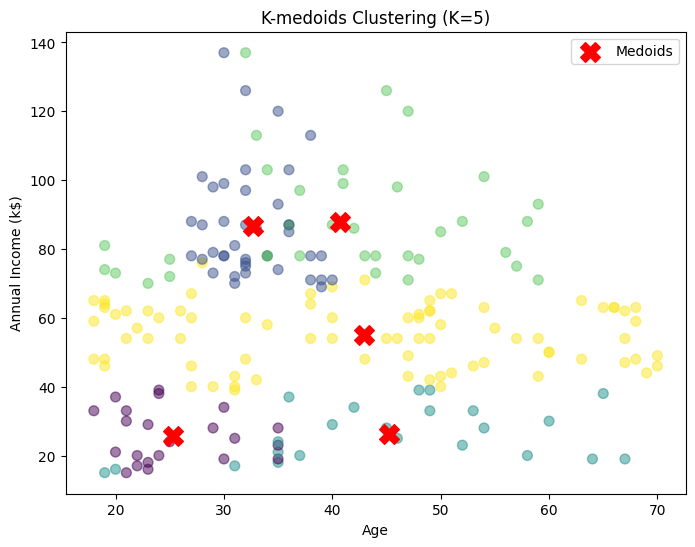

For K=2:
   CustomerID    Gender        Age  Annual Income (k$)  Spending Score (1-100)
0        46.0  0.604396  40.340659           37.527473               50.340659
1       146.0  0.522936  37.605505           79.788991               50.082569
For K=3:
   CustomerID    Gender        Age  Annual Income (k$)  Spending Score (1-100)
0       162.0  0.473684  40.394737           87.000000               18.631579
1       162.0  0.538462  32.692308           86.538462               82.128205
2        62.0  0.593496  40.325203           44.154472               49.829268
For K=5:
   CustomerID    Gender        Age  Annual Income (k$)  Spending Score (1-100)
0   71.625000  0.614583  44.770833           48.635417               42.812500
1  162.000000  0.538462  32.692308           86.538462               82.128205
2  189.000000  0.636364  42.636364          108.181818               21.272727
3  151.000000  0.407407  39.481481           78.370370               17.555556
4   27.777778  0.518519  

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the dataset into your preferred programming environment.
data = pd.read_csv("Mall_Customers.csv")

# Step 2: Preprocess the data as necessary. You may need to encode categorical variables like Gender.
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Step 3: Choose appropriate features for clustering. Consider using Age, Annual Income, and Spending Score for segmentation.
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Step 4: Try different number of K values i.e., K=2, 3, 5.
K_values = [2, 3, 5]

# Step 5: Perform K-medoids clustering on the selected features.
def kmedoids(X, K, max_iter=300):

    medoids_idx = np.random.choice(len(X), K, replace=False)
    medoids = X.iloc[medoids_idx].values

    for _ in range(max_iter):
        distances = np.linalg.norm(X.values[:, np.newaxis] - medoids, axis=2)
        clusters = np.argmin(distances, axis=1)

        new_medoids = np.array([X.values[clusters == k].mean(axis=0) for k in range(K)])

        if np.all(medoids == new_medoids):
            break

        medoids = new_medoids

    return clusters, medoids

# Step 6: Visualize the clusters to gain insights into customer segmentation.
for K in K_values:
    clusters, medoids = kmedoids(X, K)

    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)
    plt.scatter(medoids[:, 0], medoids[:, 1], c='red', marker='X', s=200, label='Medoids')
    plt.title(f'K-medoids Clustering (K={K})')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()
    plt.show()

# Step 7: Interpret the results and provide recommendations for marketing strategies
for K in K_values:
    clusters, _ = kmedoids(X, K)
    print(f"For K={K}:")
    print(data.groupby(clusters).mean())
